Импортируем нужные библиотеки и читаем таблицу с данными

In [103]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Смотри количество пропусков

In [104]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Заполняем пропуски в слобце Age медианным значением

In [105]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
median_value = df['Age'].median()
df['Age'] = df['Age'].fillna(median_value)
df['Age'] = df['Age'].astype(int)
df['Age'].info()


<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Age
Non-Null Count  Dtype
--------------  -----
891 non-null    int32
dtypes: int32(1)
memory usage: 3.6 KB


Гипотеза: Дети имеют самый большой шанс выживания

Шанс выживания на титанике: 38.38 %
Шанс выживания на титанике, если ты ребенок: 53.98 %


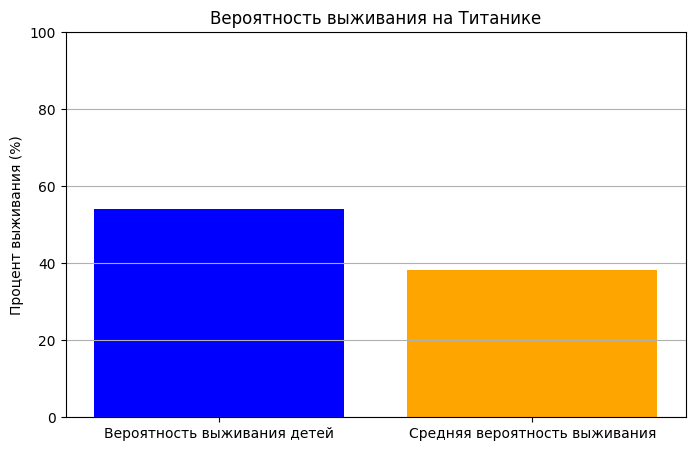

In [106]:
children = df[df['Age'] < 18]


children_survival_probability = children['Survived'].mean() * 100
average_survival = df['Survived'].mean() * 100

print(f'Шанс выживания на титанике: {(average_survival).round(2)} %')
print(f'Шанс выживания на титанике, если ты ребенок: {(children_survival_probability).round(2)} %')
# Данные для графика
labels = ['Вероятность выживания детей', 'Средняя вероятность выживания']
values = [children_survival_probability, average_survival]

# Построение графика
plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=['blue', 'orange'])
plt.ylabel('Процент выживания (%)')
plt.title('Вероятность выживания на Титанике')
plt.ylim(0, 100)
plt.grid(axis='y')

plt.show()



Гипотеза верна. Процент выживания на титанике выше, если ты ребенок.

Гипотеза: Шанс выжить на титанике выше, если ты пенсионер

Шанс выживания на титанике: 38.38 %
Шанс выживания на титанике, если ты пенсионер: 26.92 %


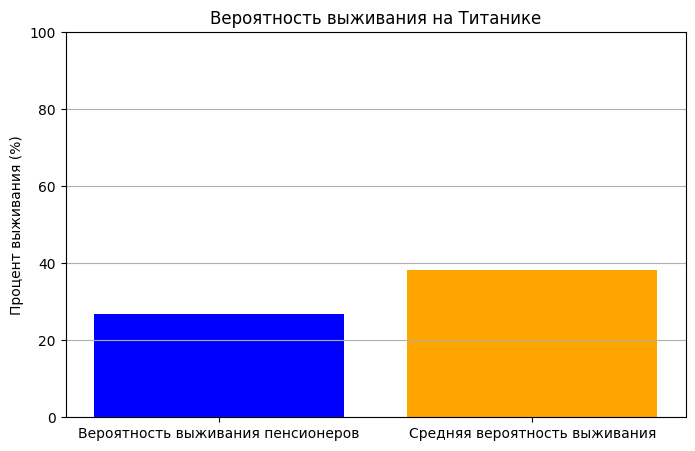

In [107]:
pensioner = df[df['Age'] >= 60]


pensioner_survival_probability = pensioner['Survived'].mean() * 100
average_survival = df['Survived'].mean() * 100

print(f'Шанс выживания на титанике: {(average_survival).round(2)} %')
print(f'Шанс выживания на титанике, если ты пенсионер: {(pensioner_survival_probability).round(2)} %')
# Данные для графика
labels = ['Вероятность выживания пенсионеров', 'Средняя вероятность выживания']
values = [pensioner_survival_probability, average_survival]

plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=['blue', 'orange'])
plt.ylabel('Процент выживания (%)')
plt.title('Вероятность выживания на Титанике')
plt.ylim(0, 100)
plt.grid(axis='y')

plt.show()

Гипотеза не верна: Шанс выжить на титанике намного ниже, если ты пенсионер

Гипотеза: Шанс выжить на титанике больше, если ты девушка

Шанс выживания на титанике: 38.38 %
Шанс выживания на титанике, если ты женщина: 74.2 %


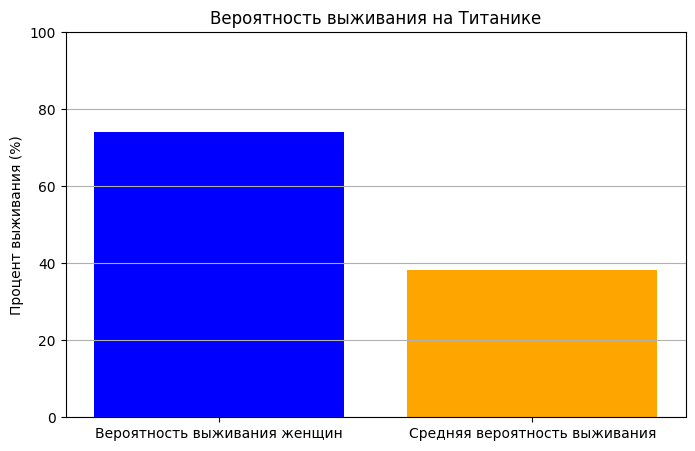

In [108]:
women = df[df['Sex'] == 'female']


women_survival_probability = women['Survived'].mean() * 100
average_survival = df['Survived'].mean() * 100

print(f'Шанс выживания на титанике: {(average_survival).round(2)} %')
print(f'Шанс выживания на титанике, если ты женщина: {(women_survival_probability).round(2)} %')
# Данные для графика
labels = ['Вероятность выживания женщин', 'Средняя вероятность выживания']
values = [women_survival_probability, average_survival]

plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=['blue', 'orange'])
plt.ylabel('Процент выживания (%)')
plt.title('Вероятность выживания на Титанике')
plt.ylim(0, 100)
plt.grid(axis='y')

plt.show()

Шанс выживания на титанике: 38.38 %
Шанс выживания на титанике, если ты мужчина: 18.89 %


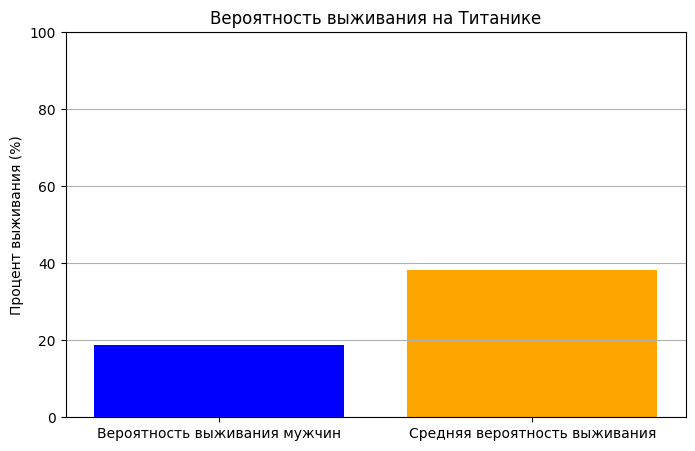

In [109]:
men = df[df['Sex'] == 'male']


men_survival_probability = men['Survived'].mean() * 100
average_survival = df['Survived'].mean() * 100

print(f'Шанс выживания на титанике: {(average_survival).round(2)} %')
print(f'Шанс выживания на титанике, если ты мужчина: {(men_survival_probability).round(2)} %')
# Данные для графика
labels = ['Вероятность выживания мужчин', 'Средняя вероятность выживания']
values = [men_survival_probability, average_survival]

plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=['blue', 'orange'])
plt.ylabel('Процент выживания (%)')
plt.title('Вероятность выживания на Титанике')
plt.ylim(0, 100)
plt.grid(axis='y')

plt.show()

Гипотеза: Пассажиры первого класса, находясь на самом верху имели самый большой доступ к шлюпкам, и из-за этого были ближе к спасению
Пассажиры второго класса имели неплохой шанс выживания, так как находились не в самом низу, в отличие от третьего класса, шанс выживания которого маленький из за трудного доступа к шлюпкам


Шанс выживания на титанике: 38.38 %
Шанс выживания на титанике пассажиров первого класса: 62.96 %
Шанс выживания на титанике пассажиров второго класса: 47.28 %
Шанс выживания на титанике пассажиров третьего класса: 24.24 %


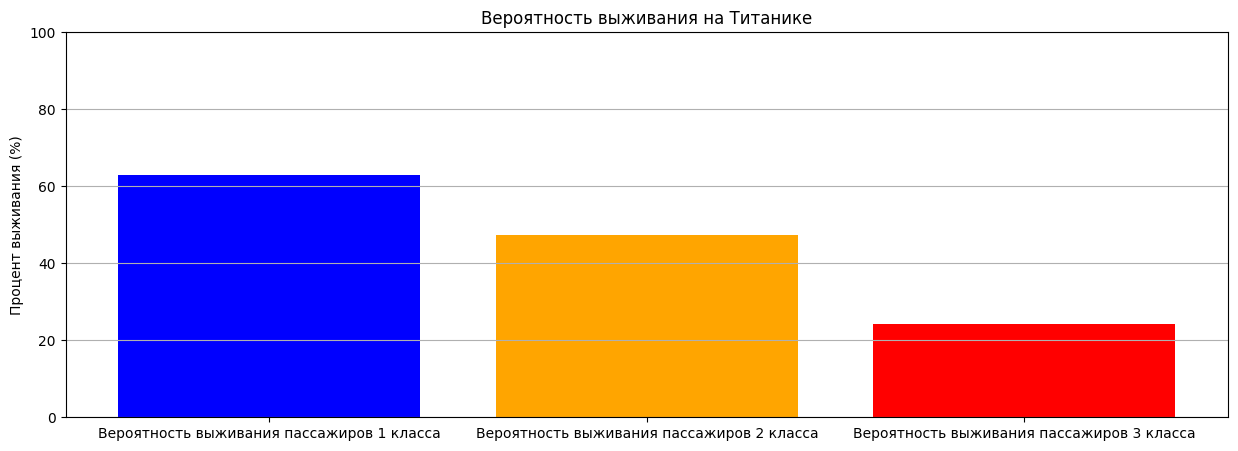

In [110]:
first_class, second_class, third_class = df[df['Pclass'] == 1], df[df['Pclass'] == 2], df[df['Pclass'] == 3]


first_class_survival_probability = first_class['Survived'].mean() * 100
second_class_survival_probability = second_class['Survived'].mean() * 100
third_class_survival_probability = third_class['Survived'].mean() * 100

print(f'Шанс выживания на титанике: {(average_survival).round(2)} %')
print(f'Шанс выживания на титанике пассажиров первого класса: {(first_class_survival_probability).round(2)} %')
print(f'Шанс выживания на титанике пассажиров второго класса: {(second_class_survival_probability).round(2)} %')
print(f'Шанс выживания на титанике пассажиров третьего класса: {(third_class_survival_probability).round(2)} %')
# Данные для графика
labels = ['Вероятность выживания пассажиров 1 класса','Вероятность выживания пассажиров 2 класса', 'Вероятность выживания пассажиров 3 класса']
values = [first_class_survival_probability, second_class_survival_probability, third_class_survival_probability]

plt.figure(figsize=(15, 5))
plt.bar(labels, values, color=['blue', 'orange', 'red'])
plt.ylabel('Процент выживания (%)')
plt.title('Вероятность выживания на Титанике')
plt.ylim(0, 100)
plt.grid(axis='y')

plt.show()

Гипотеза верна, пассажиры третьего класса имеют меньший шанс на выживание. Далее идут пассажиры 2 класса, и больший шанс имеют пассажиры 1 класса. В следствие этой гипотезы можем сказать, что чем выше стоимость билета тем больше шанс выживания

Шанс выживания на титанике: 38.38 %
Шанс выживания с низкой стоимостью билета: 25.06 %
Шанс выживания со средней стоимостью билета: 43.59 %
Шанс выживания с высокой стоимостью билета: 64.91 %


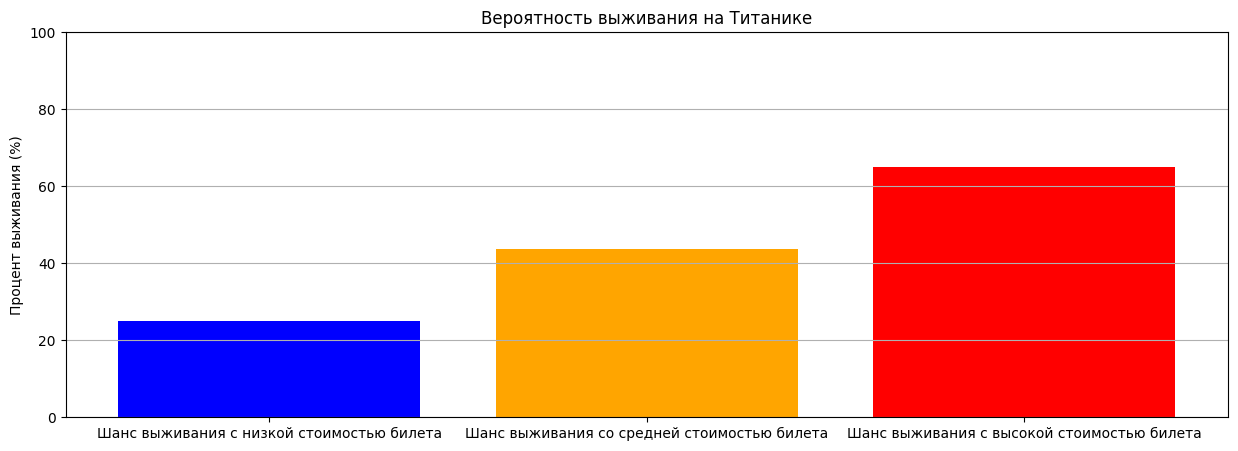

In [111]:
medium_fare = df['Fare'].median()
medium_fare = df['Fare'].median()
low_price = df[df['Fare'] <= medium_fare]
medium_price = df[(df['Fare'] > medium_fare) & (df['Fare'] <= 3 * medium_fare)]
high_price = df[df['Fare'] > 3 * medium_fare]

low_price_survival_probability = low_price['Survived'].mean() * 100
medium_price_survival_probability = medium_price['Survived'].mean() * 100
high_price_survival_probability = high_price['Survived'].mean() * 100

average_survival = df['Survived'].mean() * 100

print(f'Шанс выживания на титанике: {(average_survival).round(2)} %')
print(f'Шанс выживания с низкой стоимостью билета: {(low_price_survival_probability).round(2)} %')
print(f'Шанс выживания со средней стоимостью билета: {(medium_price_survival_probability).round(2)} %')
print(f'Шанс выживания с высокой стоимостью билета: {(high_price_survival_probability).round(2)} %')

# Данные для графика
labels = ['Шанс выживания с низкой стоимостью билета',
          'Шанс выживания со средней стоимостью билета',
          'Шанс выживания с высокой стоимостью билета']
values = [low_price_survival_probability, medium_price_survival_probability, high_price_survival_probability]

plt.figure(figsize=(15, 5))
plt.bar(labels, values, color=['blue', 'orange', 'red'])
plt.ylabel('Процент выживания (%)')
plt.title('Вероятность выживания на Титанике')
plt.ylim(0, 100)
plt.grid(axis='y')

plt.show()



Как можно заметить график коррелирует с предыдущим и можно однозначно сделать вывод, чем дороже стоимость билета, тем больший шанс на выживание имеет пассажир.

Гипотеза: Пассажир мог иметь больший шанс выживания, если бы плыл на титанике вместе с родственниками, которые могли бы ему помочь во время крушения лайнера

Шанс выживания на титанике: 38.38 %
Шанс выживания с родственниками: 50.56 %
Шанс выживания без родственников: 30.35 %


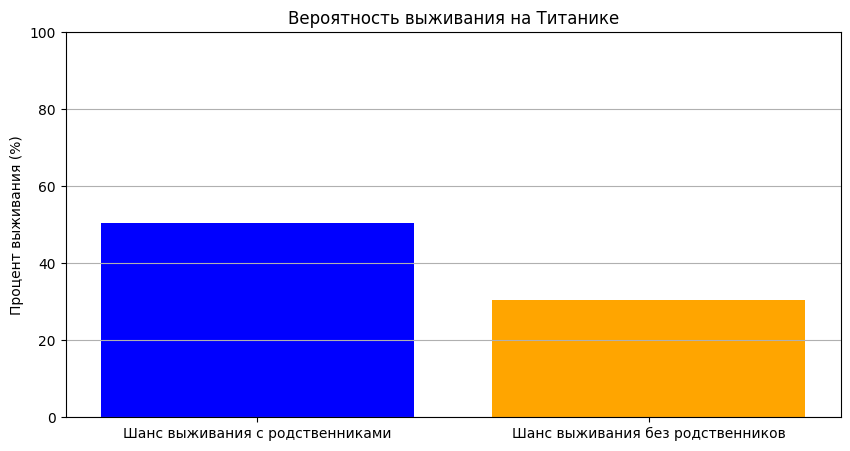

In [112]:
df['Family'] = df['SibSp'] + df['Parch']
without_family = df[df['Family'] == 0]
with_family = df[(df['Family'] >= 1 )]


without_family_survival_probability = without_family['Survived'].mean() * 100
with_family_survival_probability = with_family['Survived'].mean() * 100

print(f'Шанс выживания на титанике: {(average_survival).round(2)} %')
print(f'Шанс выживания с родственниками: {(with_family_survival_probability).round(2)} %')
print(f'Шанс выживания без родственников: {(without_family_survival_probability).round(2)} %')

# Данные для графика
labels = ['Шанс выживания с родственниками',
          'Шанс выживания без родственников',]
values = [with_family_survival_probability, without_family_survival_probability]

plt.figure(figsize=(10, 5))
plt.bar(labels, values, color=['blue', 'orange', 'red'])
plt.ylabel('Процент выживания (%)')
plt.title('Вероятность выживания на Титанике')
plt.ylim(0, 100)
plt.grid(axis='y')

plt.show()


Гипотеза верна. Пассажиры с родственниками на борту спались чаще чем без.

Гипотеза: Пассажиры с известным номером каюты спасались чаще

Шанс выживания на титанике: 38.38 %
Шанс выживания с каютой: 66.67 %
Шанс выживания без каюты: 29.99 %


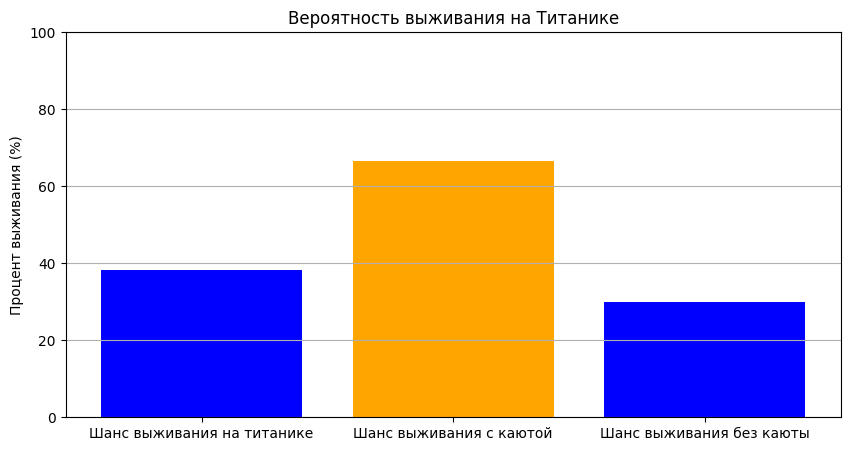

In [113]:
without_cabin = df[df['Cabin'].isnull()]
with_cabin = df[df['Cabin'].notnull()]

# Расчет вероятности выживания
without_cabin_survival_probability = without_cabin['Survived'].mean() * 100
with_cabin_survival_probability = with_cabin['Survived'].mean() * 100
average_survival = df['Survived'].mean() * 100

# Вывод результатов
print(f'Шанс выживания на титанике: {round(average_survival, 2)} %')
print(f'Шанс выживания с каютой: {round(with_cabin_survival_probability, 2)} %')
print(f'Шанс выживания без каюты: {round(without_cabin_survival_probability, 2)} %')

# Данные для графика
labels = ['Шанс выживания на титанике', 'Шанс выживания с каютой', 'Шанс выживания без каюты']
values = [average_survival, with_cabin_survival_probability, without_cabin_survival_probability]

plt.figure(figsize=(10, 5))
plt.bar(labels, values, color=['blue', 'orange'])
plt.ylabel('Процент выживания (%)')
plt.title('Вероятность выживания на Титанике')
plt.ylim(0, 100)
plt.grid(axis='y')

plt.show()

Гипотеза подтвердилась. Если указана каюта то шанс выживания намного выше. Скорее всего это связано с тем что преимущественно сохранилась информация о пассажирах первого класса, среди которых были известные личности.

Этап 2: Добавляем колонки & Избавляемся от пропусков и от ненужных колонок

In [114]:

df['AgeGroup'] = df['Age'].apply(lambda x: 1 if x < 18 else (2 if 18 <= x <= 60 else 3))
df['Have_Family'] = df['Family'].apply(lambda x: 0 if x == 0 else 1)
df['Have_Cabin'] = df['Cabin'].apply(lambda x: 1 if pd.notnull(x) else 0)
df['Embarked'].fillna('S')
df.drop(columns='Cabin')
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Family           0
AgeGroup         0
Have_Family      0
Have_Cabin       0
dtype: int64

In [115]:
df.dtypes 

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age              int32
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Family           int64
AgeGroup         int64
Have_Family      int64
Have_Cabin       int64
dtype: object

Избавляемся от типа object

In [116]:
from sklearn.preprocessing import LabelEncoder
categories = df.select_dtypes(include=('object')).columns
for col in categories:
    df[col] = LabelEncoder().fit_transform(df[col])

df.dtypes



PassengerId      int64
Survived         int64
Pclass           int64
Name             int32
Sex              int32
Age              int32
SibSp            int64
Parch            int64
Ticket           int32
Fare           float64
Cabin            int32
Embarked         int32
Family           int64
AgeGroup         int64
Have_Family      int64
Have_Cabin       int64
dtype: object

In [117]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,AgeGroup,Have_Family,Have_Cabin
0,1,0,3,108,1,22,1,0,523,7.2500,147,2,1,2,1,0
1,2,1,1,190,0,38,1,0,596,71.2833,81,0,1,2,1,1
2,3,1,3,353,0,26,0,0,669,7.9250,147,2,0,2,0,0
3,4,1,1,272,0,35,1,0,49,53.1000,55,2,1,2,1,1
4,5,0,3,15,1,35,0,0,472,8.0500,147,2,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,1,27,0,0,101,13.0000,147,2,0,2,0,0
887,888,1,1,303,0,19,0,0,14,30.0000,30,2,0,2,0,1
888,889,0,3,413,0,28,1,2,675,23.4500,147,2,3,2,1,0
889,890,1,1,81,1,26,0,0,8,30.0000,60,0,0,2,0,1


<Axes: >

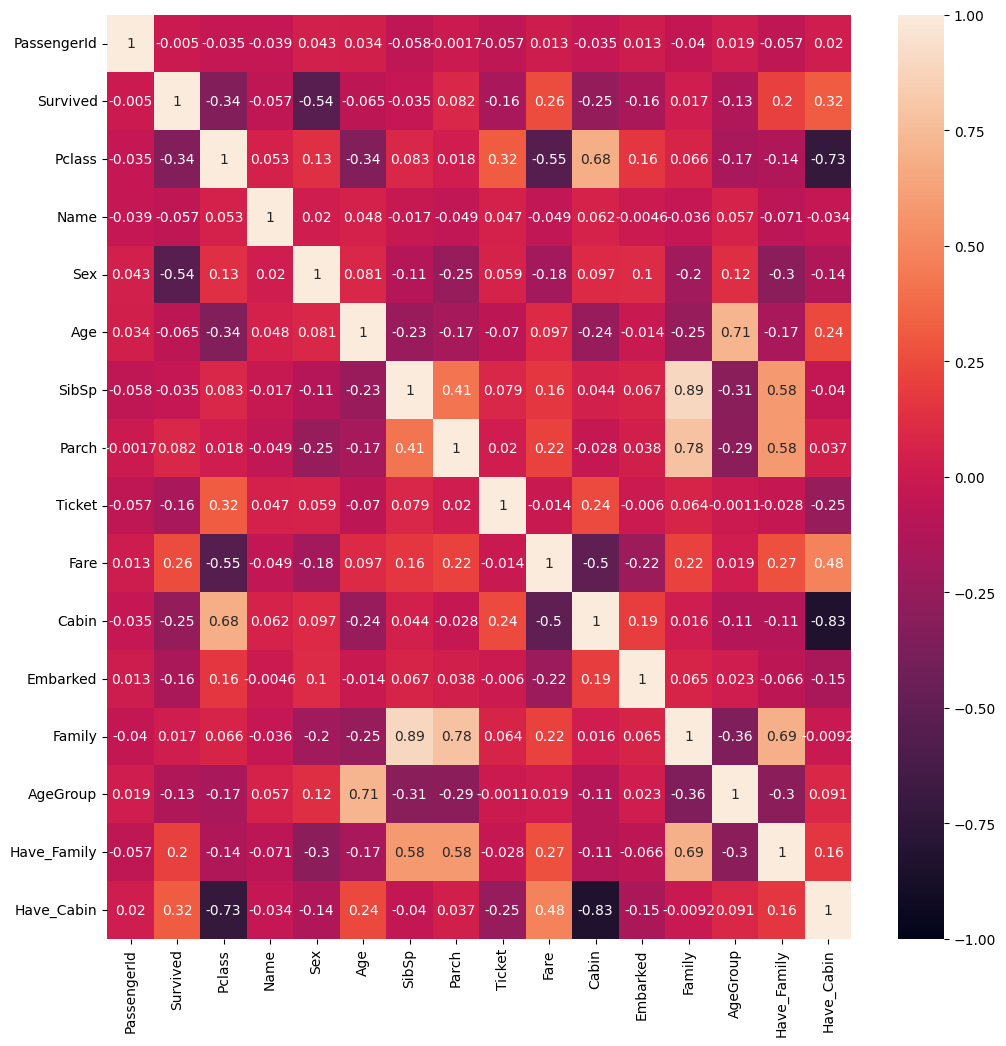

In [122]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, ax=ax)

Можно заметить что самыми ключевыми параметрами выживаемости являются наличие кабины в табличке, наличие семьи, стоимость билета, также параметр ,,пол,, является ключевым, тк male = 1, female = 0, отрицательная корреляция указывает на то, что женщины имели намного более высокий шанс выжить

3. Обучение модели

In [118]:
x = df.drop(columns='Survived')
y = df['Survived']
x

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,AgeGroup,Have_Family,Have_Cabin
0,1,3,108,1,22,1,0,523,7.2500,147,2,1,2,1,0
1,2,1,190,0,38,1,0,596,71.2833,81,0,1,2,1,1
2,3,3,353,0,26,0,0,669,7.9250,147,2,0,2,0,0
3,4,1,272,0,35,1,0,49,53.1000,55,2,1,2,1,1
4,5,3,15,1,35,0,0,472,8.0500,147,2,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,548,1,27,0,0,101,13.0000,147,2,0,2,0,0
887,888,1,303,0,19,0,0,14,30.0000,30,2,0,2,0,1
888,889,3,413,0,28,1,2,675,23.4500,147,2,3,2,1,0
889,890,1,81,1,26,0,0,8,30.0000,60,0,0,2,0,1


In [119]:
y.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
import tensorflow as tf

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
input_dim = 15

model = Sequential()
model.add(Dense(64, activation='relu', input_dim=input_dim, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.00015), loss='binary_crossentropy', metrics=['accuracy'], )

history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.2)

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

Epoch 1/100


c:\Users\ADM\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6471 - loss: 1.6228 - val_accuracy: 0.6853 - val_loss: 1.5320
Epoch 2/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5802 - loss: 1.6816 - val_accuracy: 0.7063 - val_loss: 1.5153
Epoch 3/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5602 - loss: 1.6356 - val_accuracy: 0.7063 - val_loss: 1.4989
Epoch 4/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5706 - loss: 1.5802 - val_accuracy: 0.7063 - val_loss: 1.4837
Epoch 5/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6105 - loss: 1.5763 - val_accuracy: 0.7133 - val_loss: 1.4698
Epoch 6/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5618 - loss: 1.5767 - val_accuracy: 0.7133 - val_loss: 1.4562
Epoch 7/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5708 - loss: 1.5722 - val_accuracy: 0.7203 - val_loss: 1.4440
Epoch 8/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6090 - loss: 1.5168 - val_accuracy: 0.7343 - val_loss: 1.4

Text(0.5, 1.0, 'Training and Validation Loss')

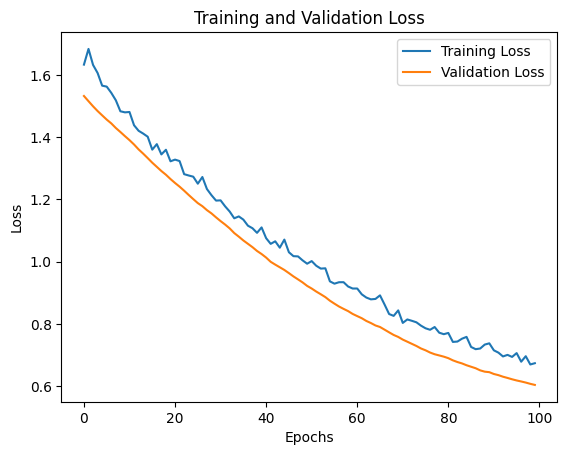

In [121]:
plt.subplot(1, 1, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

Accuracy в зависимости от характеристик меняется от 0.81 до 0.83 в среднем. График loss получился рваным, очень много игрался в характеристиками, меня learning rate, менял кол - во  эпох, добавил регуляризаторы, но график таким и остался, предполагаю что это из -за недостаточно объемного датасета

In [131]:
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
import tensorflow as tf

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
input_dim = x.shape[1]

def create_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=input_dim, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.00015), loss='binary_crossentropy', metrics=['accuracy'])
    return model

kf = KFold(n_splits=3, shuffle=True, random_state=42)
best_model = None
best_accuracy = 0

for fold, (train_index, val_index) in enumerate(kf.split(X_train)):
    print(f"Fold {fold + 1}")

    model = create_model()

    history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.2)

    loss, accuracy = model.evaluate(X_test, y_test)
    print(f'Validation Accuracy: {accuracy:.2f}')

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

loss, accuracy = best_model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')


y_pred = best_model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

conf_matrix = confusion_matrix(y_test, y_pred_binary)


tn, fp, fn, tp = conf_matrix.ravel()
print(f"True Negatives (TN): {tn}. False Positives (FP): {fp}. False Negatives (FN): {fn}. True Positives (TP): {tp}")
print(f"Лучшая модель достигла точности {best_accuracy:.2f} на тестовых данных.")
print(f"Модель предсказала, что погибнет, а по факту не погиб (FP): {fp}. Модель предсказала, что не погибнет, а по факту не погиб (TN): {tn}. Модель предсказала, что не погибнет, а по факту погиб (FN): {fn}. Модель предсказала, что погибнет, а по факту погиб (TP): {tp}")

Fold 1
Epoch 1/100


c:\Users\ADM\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5460 - loss: 1.6569 - val_accuracy: 0.6573 - val_loss: 1.4999
Epoch 2/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5977 - loss: 1.5378 - val_accuracy: 0.6573 - val_loss: 1.4822
Epoch 3/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6018 - loss: 1.5845 - val_accuracy: 0.6713 - val_loss: 1.4647
Epoch 4/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6047 - loss: 1.5253 - val_accuracy: 0.6783 - val_loss: 1.4475
Epoch 5/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5167 - loss: 1.5739 - val_accuracy: 0.6923 - val_loss: 1.4321
Epoch 6/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5917 - loss: 1.5157 - val_accuracy: 0.6993 - val_loss: 1.4175
Epoch 7/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6181 - loss: 1.4837 - val_accuracy: 0.6923 - val_loss: 1.4019
Epoch 8/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6139 - loss: 1.4619 - val_accuracy: 0.7063 - val_loss: 1.3

Мы провели кросс-валидацию с 3 фолдами и выбрали лучшую модель на основе валидационной точности. Лучшая модель была оценена на тестовых данных, и результаты были проанализированы с помощью classification_report и confusion_matrix.